# Data Analysis

In [1]:
import pandas as pd
df = pd.read_csv("reuters-allcats.csv")

shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])


DataFrame Shape : (4079, 2)

Number of rows : 4079

Number of columns : 2


In [2]:
df.head()

,class,text
0,Neg-,2 BAHIA COCOA REVIEW SALVADOR Feb 26 - Sh...
1,Neg-,2 USX ltX DEBT DOWGRADED BY MOODYS NEW YOR...
2,Pos-earn,2 COBANCO INC ltCBCO YEAR NET SANTA CRUZ ...
3,Pos-earn,2 BROWN-FORMAN INC ltBFD 4TH QTR NET LOUIS...
4,Neg-,2 HUGHES CAPITAL UNIT SIGNS PACT WITH BEAR STE...


In [3]:
df.tail()

,class,text
4074,Pos-acq,2 CABLE AND WIRELESS DETAILS MERGER OF HK UNIT...
4075,Pos-acq,2 CABLE AND WIRELESS TO MERGE TWO HK UNITS INT...
4076,Pos-coffee,2 UGANDA PLANS TO EXPORT ROASTED COFFEE TO EUR...
4077,Pos-acq,2 NZS CHASE CORP MAKES OFFER FOR ENTREGROWTH ...
4078,Neg-,2 SOVIET INDUSTRIAL GROWTHTRADE SLOWER IN 1987...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4079 entries, 0 to 4078
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   4079 non-null   object
 1   text    4079 non-null   object
dtypes: object(2)
memory usage: 63.9+ KB


In [5]:
df.describe()

,class,text
count,4079,4079
unique,7,4067
top,Neg-,2 MATSUSHITA TO ISSUE 200 BILLION YEN CONVERTI...
freq,1929,2


In [6]:
import numpy as np
df.describe(include=object)

,class,text
count,4079,4079
unique,7,4067
top,Neg-,2 MATSUSHITA TO ISSUE 200 BILLION YEN CONVERTI...
freq,1929,2


In [7]:
df["class"].value_counts()

Neg-           1929
Pos-earn       1280
Pos-acq         790
Pos-coffee       35
Pos-gold         34
Pos-housing       7
Pos-heat          4
Name: class, dtype: int64

<Axes: >

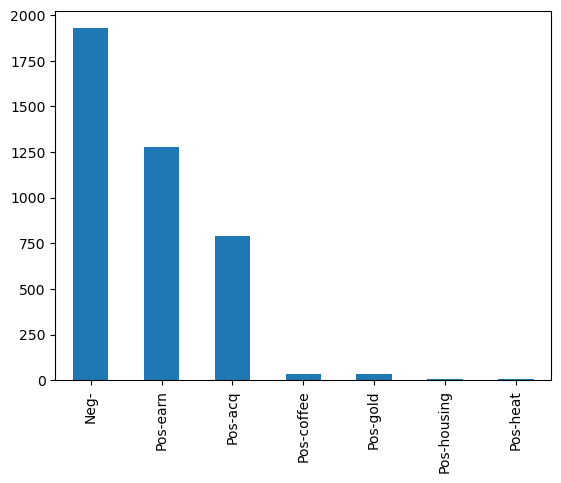

In [8]:
df["class"].value_counts().plot(kind="bar")

# train the model

In [1]:
!pip install -q ludwig

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.5/874.5 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 9.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 53.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10

In [3]:
!wget https://raw.githubusercontent.com/paiml/practical-mlops-book/main/chap05/config.yaml

--2023-04-15 08:02:17--  https://raw.githubusercontent.com/paiml/practical-mlops-book/main/chap05/config.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176 [text/plain]
Saving to: ‘config.yaml’

config.yaml         100%[===================>]     176  --.-KB/s    in 0s      

2023-04-15 08:02:18 (9.66 MB/s) - ‘config.yaml’ saved [176/176]



In [4]:
!wget https://raw.githubusercontent.com/paiml/practical-mlops-book/main/chap05/reuters-allcats.csv

--2023-04-15 08:02:38--  https://raw.githubusercontent.com/paiml/practical-mlops-book/main/chap05/reuters-allcats.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3381488 (3.2M) [text/plain]
Saving to: ‘reuters-allcats.csv’

reuters-allcats.csv 100%[===================>]   3.22M  --.-KB/s    in 0.09s   

2023-04-15 08:02:39 (37.4 MB/s) - ‘reuters-allcats.csv’ saved [3381488/3381488]



# Train the model

In [7]:
!ludwig experiment --dataset reuters-allcats.csv --config config.yaml

███████████████████████
█ █ █ █  ▜█ █ █ █ █   █
█ █ █ █ █ █ █ █ █ █ ███
█ █   █ █ █ █ █ █ █ ▌ █
█ █████ █ █ █ █ █ █ █ █
█     █  ▟█     █ █   █
███████████████████████
ludwig v0.7.4 - Experiment


╒════════════════════════╕
│ EXPERIMENT DESCRIPTION │
╘════════════════════════╛

╒══════════════════╤═════════════════════════════════════════════════════════════════════════════╕
│ Experiment name  │ experiment                                                                  │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Model name       │ run                                                                         │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ Output directory │ /content/results/experiment_run                                             │
├──────────────────┼─────────────────────────────────────────────────────────────────────────────┤
│ ludwig_version   │ '0.7.4'